# Statistical analysis of each model

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az

import matplotlib.pyplot as plt
import seaborn as sns

# add regular stat for skeptics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg



In [19]:
# grab data
dfSCR = pd.read_csv('../scr_clean2.csv')
dfROIs = pd.read_csv('../amg_hipp_fc_WholeROIs.csv')

In [20]:
dfSCR.head(10)

,sub,Condition,Event.Nr,CDA.AmpSum,expected_value,pe,scr
0,sub-189,CSplusUS1,1,0.2852,0.801175,0.500000,0.2852
1,sub-189,CSminus1,2,0.1033,0.796939,-0.500000,0.1033
2,sub-189,CSplus1,3,0.0783,0.799047,-0.501304,0.0783
3,sub-189,CSplusUS1,4,0.1772,0.801165,0.500006,0.1772
4,sub-189,CSminus1,5,0.0000,0.794832,-0.498696,0.0000
5,sub-189,CSplus1,6,0.0000,0.799037,-0.501298,0.0000
6,sub-189,CSplus1,7,0.0000,0.796919,-0.499987,0.0000
7,sub-189,CSminus1,8,0.0000,0.792734,-0.497398,0.0000
8,sub-189,CSplusUS1,9,0.2063,0.799047,0.501317,0.2063
9,sub-189,CSminus1,10,0.0000,0.790647,-0.496106,0.0000


In [21]:
dfROIs.head()

,index,subject,trialNo,condition,coupling,amg,amg_vmpfc
0,0,sub-1222,1,CSplusUS1,0.690476,-0.158438,0.714286
1,1,sub-1222,2,CSminus1,0.523810,0.351462,0.761905
2,2,sub-1222,3,CSplus1,0.047619,0.001373,0.833333
3,3,sub-1222,4,CSplusUS1,0.642857,-0.043723,0.761905
4,4,sub-1222,5,CSminus1,0.738095,0.033245,0.809524


In [22]:
df = pd.merge(dfSCR, dfROIs, left_on=['sub','Event.Nr'], right_on=['subject','trialNo'])
df

,sub,Condition,Event.Nr,CDA.AmpSum,expected_value,pe,scr,index,subject,trialNo,condition,coupling,amg,amg_vmpfc
0,sub-189,CSplusUS1,1,0.2852,0.801175,0.500000,0.2852,1518,sub-189,1,CSplusUS1,0.904762,0.561003,0.880952
1,sub-189,CSminus1,2,0.1033,0.796939,-0.500000,0.1033,1519,sub-189,2,CSminus1,0.047619,-0.021780,0.690476
2,sub-189,CSplus1,3,0.0783,0.799047,-0.501304,0.0783,1520,sub-189,3,CSplus1,0.476190,-0.055494,0.500000
3,sub-189,CSplusUS1,4,0.1772,0.801165,0.500006,0.1772,1521,sub-189,4,CSplusUS1,0.690476,-0.190930,0.928571
4,sub-189,CSminus1,5,0.0000,0.794832,-0.498696,0.0000,1522,sub-189,5,CSminus1,0.761905,0.028911,0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480,sub-152,CSplus2,65,0.0000,0.012591,-0.041406,0.0000,961,sub-152,65,CSplus2,0.571429,0.262373,0.952381
4481,sub-152,CSminus2,66,0.0000,0.149719,-0.372661,0.0000,962,sub-152,66,CSminus2,0.238095,0.055292,0.166667
4482,sub-152,CSminus2,67,0.0000,0.113651,-0.284416,0.0000,963,sub-152,67,CSminus2,0.404762,0.146620,0.261905
4483,sub-152,CSplus2,68,0.0000,0.011487,-0.038340,0.0000,964,sub-152,68,CSplus2,0.785714,-0.179821,0.071429


In [23]:
len(df['sub'].unique()) # 65

65

In [24]:
df.coupling.std()

0.3143222026881028

<AxesSubplot:xlabel='scr', ylabel='Count'>

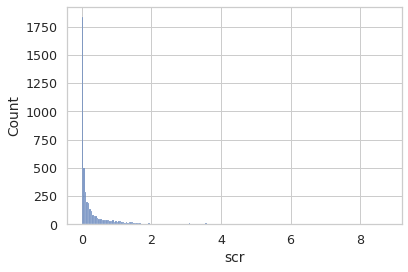

In [25]:
sns.histplot(df.scr)

<AxesSubplot:xlabel='coupling', ylabel='Count'>

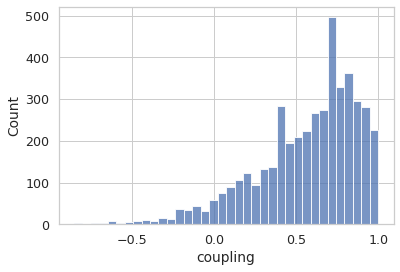

In [26]:
sns.histplot(df.coupling)

## Coupling predicted by condition 
- Hypothesis: CS+US will have higher coupling compared to CS+ and CS-

In [10]:
glm = smf.mixedlm('coupling ~ C(condition) + trialNo+ amg', data=df, 
    groups = 'subject', 
                 missing='drop')
model1 = glm.fit()
print(model1.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     coupling  
No. Observations:      4485        Method:                 REML      
No. Groups:            65          Scale:                  0.0891    
Min. group size:       69          Log-Likelihood:         -1034.8188
Max. group size:       69          Converged:              Yes       
Mean group size:       69.0                                          
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.529    0.017 30.394 0.000  0.495  0.563
C(condition)[T.CSminus2]   -0.003    0.021 -0.136 0.892 -0.044  0.039
C(condition)[T.CSminusUS2]  0.047    0.022  2.141 0.032  0.004  0.090
C(condition)[T.CSplus1]    -0.031    0.015 -2.034 0.042 -0.060 -0.001
C(condition)[T.CSplus2]    -0.012   

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [27]:
# Bayes model
# organize data
df['sub'] = df['sub'].astype('category')
#df['condition'] = df['condition'].astype('category')

n_sub = len(df['sub'].unique())
subIDX = df['sub'].cat.codes.values
# condition
n_cond = len(df['condition'].unique())
#condIDX = df['condition'].cat.codes.values
trials = df.trialNo.values - 1
amygdala = df.amg.values
# trialNo
y = df.coupling.values - df.coupling.mean()

df['condition'].unique()

# generating condition index
df['cond'] = df['condition']#
df = df.replace(to_replace={'cond': {'CSminus1':0, 'CSplus1':1, 'CSplusUS1':2, 'CSplus2':3, 'CSminus2':4, 'CSminusUS2':5}})

condIDX = df.cond.values

In [49]:
# use reparametarization of the same model
# add hyperpriors
with pm.Model() as model6:
    
    
    mu_a = pm.Normal('mu_a', mu=0, sigma=.5)
    sigma_a = pm.HalfCauchy('sigma_a', .5)
    a_matt = pm.Normal('a_matt', mu=0, sd=1, shape=n_sub)
    a = pm.Deterministic('a', mu_a + sigma_a*a_matt)
    
    mu_b = pm.Normal('mu_b', mu=0, sigma=.5)
    sigma_b = pm.HalfCauchy('sigma_b', .5)
    b_matt = pm.Normal('b_matt', mu=0, sigma=1, shape=n_cond)
    b_cond = pm.Deterministic('b_cond', mu_b + sigma_b*b_matt)
    
    # add trials and amygdala activation
    b_trials = pm.Normal('b_trials', mu=0, sigma=.5)
    b_amg = pm.Normal('b_amg', mu=0, sigma=.5)
   
   
  
    eps = pm.HalfCauchy('eps', .5)
    
    # make mu a determenistic distribution so we can test later vs. actual data
    
    mu = pm.Deterministic('mu',a[subIDX] + b_cond[condIDX] + b_trials*trials + b_amg*df.amg)
    
    y_hat = pm.Normal('y_hat', mu=mu, sigma=eps, observed=df.coupling)
    
    trace6 = pm.sample(target_accept=.95, chains=4, cores=10, return_inferencedata=True, draws=2000, tune=2000)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 10 jobs)
NUTS: [eps, b_amg, b_trials, b_matt, sigma_b, mu_b, a_matt, sigma_a, mu_a]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 735 seconds.


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b_matt'}>,
        <AxesSubplot:title={'center':'b_matt'}>],
       [<AxesSubplot:title={'center':'b_cond'}>,
        <AxesSubplot:title={'center':'b_cond'}>]], dtype=object)

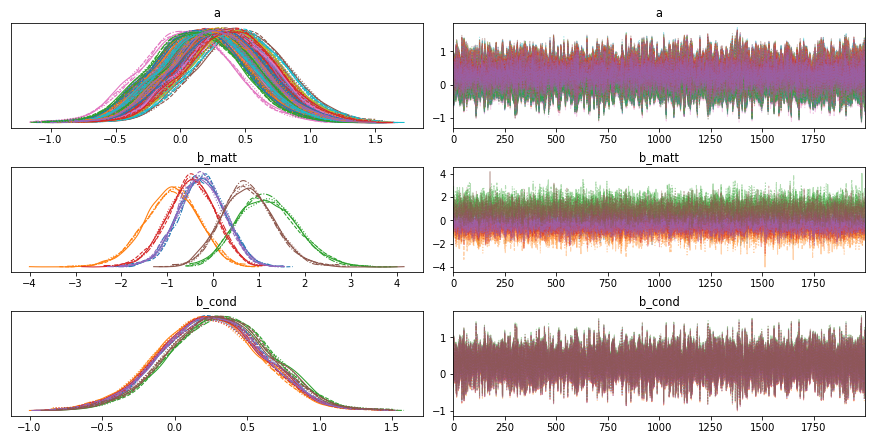

In [16]:
az.plot_trace(trace6, var_names=['a','b_matt','b_cond'])

In [50]:
az.summary(trace6, var_names=['b_cond','b_matt'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_cond[0],0.257,0.359,-0.389,0.943,0.004,0.003,8322.0,6121.0,1.0
b_cond[1],0.228,0.359,-0.436,0.890,0.004,0.004,8327.0,6052.0,1.0
b_cond[2],0.320,0.360,-0.340,0.993,0.004,0.003,8306.0,6100.0,1.0
b_cond[3],0.247,0.359,-0.418,0.912,0.004,0.004,8340.0,6146.0,1.0
b_cond[4],0.256,0.359,-0.416,0.914,0.004,0.003,8347.0,6107.0,1.0
b_cond[5],0.301,0.359,-0.364,0.969,0.004,0.003,8326.0,6121.0,1.0
b_matt[0],-0.249,0.508,-1.231,0.670,0.007,0.005,4853.0,5101.0,1.0
b_matt[1],-0.917,0.596,-2.002,0.227,0.010,0.007,3998.0,5253.0,1.0
b_matt[2],1.169,0.648,-0.027,2.389,0.009,0.006,5371.0,5843.0,1.0
b_matt[3],-0.479,0.521,-1.484,0.458,0.008,0.005,4814.0,5675.0,1.0


In [51]:
trStacked = trace6.posterior.stack(draws=('chain','draw'))


#### Remember the order to use for comparison
'CSminus1':0, 'CSplus1':1, 'CSplusUS1':2, 'CSplus2':3, 'CSminus2':4, 'CSminusUS2':5

In [52]:
trStacked.b_cond.shape

(6, 8000)

In [53]:
csminus1 = trStacked.b_cond[0,:].values
csplus1 = trStacked.b_cond[1,:].values
csPlusUS1 = trStacked.b_cond[2,:].values
csminus2 = trStacked.b_cond[4,:].values
csplus2 = trStacked.b_cond[3,:].values
csPlusUS2 = trStacked.b_cond[5,:].values
csUSboth = np.mean(np.stack([csPlusUS1, csPlusUS2]), axis=0) # averaging across USs
csall = np.mean(np.stack([csminus1,csminus2, csplus1, csplus2]), axis=0) # averaging across CSs
usVcs = csUSboth - csall

<AxesSubplot:ylabel='Count'>

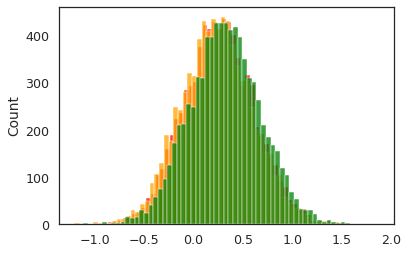

In [54]:
sns.histplot(csminus1, color='red')
sns.histplot(csplus1, color='orange')
sns.histplot(csPlusUS1, color='green')

Text(0.5, 1.0, 'CSPlusUS-CS in anterior Hippocampus')

<Figure size 1296x216 with 0 Axes>

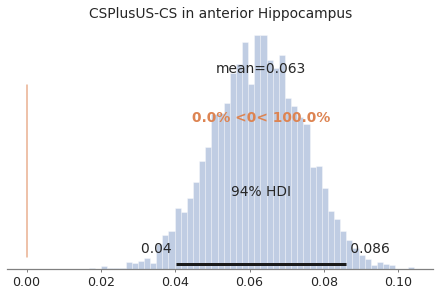

In [55]:
sns.set_style('ticks')
fig = plt.figure(figsize=(18,3))
az.plot_posterior(usVcs, point_estimate='mean', kind='hist', ref_val=0).set_title("CSPlusUS-CS in anterior Hippocampus")


In [58]:
sum(usVcs > 0)

8000

In [56]:
print(f'Standardized coeficient {np.mean(usVcs) / np.std(usVcs)}')
az.summary(usVcs)

arviz - WARNING - Shape validation failed: input_shape: (1, 8000), minimum_shape: (chains=2, draws=4)


Standardized coeficient 5.135215476661967


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.063,0.012,0.04,0.086,0.0,0.0,6214.0,5285.0,NaN


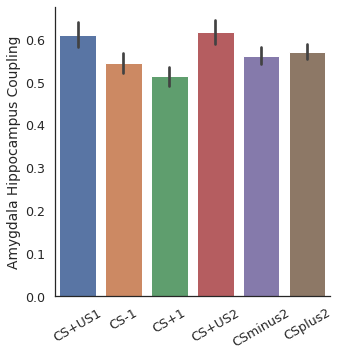

In [25]:
sns.set(font_scale = 1.15)
sns.set_style("white")
g = sns.catplot(y='coupling',x='condition', data=df, kind='bar', ci=95)
g.set_xlabels("")
g.set_xticklabels(
    labels=["CS+US1", "CS-1", "CS+1", "CS+US2", "CSminus2", "CSplus2"], rotation=30)

g.set_ylabels("Amygdala Hippocampus Coupling")
#g.savefig('coupling_different_Conditions.png', dpi=300, bbox_inches='tight')

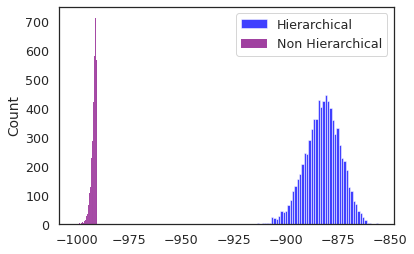

In [37]:
# calculate logP
logP = trace6.sample_stats.lp.stack(draws=('chain','draw'))
logP1 = trace1.sample_stats.lp.stack(draws=('chain','draw'))
sns.histplot(logP, label='Hierarchical', color='blue')
sns.histplot(logP1, label='Non Hierarchical', color='purple')
plt.legend()

### Posterior predictive checks

In [147]:
with model6:
    ppc = pm.sample_posterior_predictive(trace7)

In [152]:
az.from_pymc3(posterior_predictive=ppc, model=model6)

Inference data with groups:
	> posterior_predictive
	> observed_data

<AxesSubplot:xlabel='y'>

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


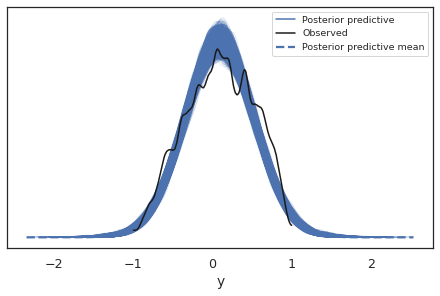

In [153]:
# plot
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model6), var_names='y')

## Next: Assessing SCR using coupling
- Now we will test SCR as predicted variable and coupling as predictor (independent)

In [36]:
glm2 = smf.mixedlm('scr~ coupling + C(condition) + trialNo+ amg', data=df, 
    groups = 'subject', 
                 missing='drop')
model2_f = glm2.fit()
print(model2_f.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     scr       
No. Observations:       4485        Method:                 REML      
No. Groups:             65          Scale:                  0.3786    
Min. group size:        69          Log-Likelihood:         -4331.5768
Max. group size:        69          Converged:              Yes       
Mean group size:        69.0                                          
----------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   0.422    0.069   6.148 0.000  0.287  0.556
C(condition)[T.CSminus2]    0.307    0.044   7.027 0.000  0.221  0.392
C(condition)[T.CSminusUS2]  0.519    0.045  11.439 0.000  0.430  0.608
C(condition)[T.CSplus1]     0.230    0.031   7.379 0.000  0.169  0.291
C(condition)[T.CSplus2]

## Bayes
- We are going to use the same model we chose (model6)

In [15]:
# use reparametarization of the same model
# add hyperpriors
with pm.Model() as model1_scr:
    
    
    mu_a = pm.Normal('mu_a', mu=0, sigma=.5)
    sigma_a = pm.HalfCauchy('sigma_a', .5)
    a_matt = pm.Normal('a_matt', mu=0, sd=1, shape=n_sub)
    a = pm.Deterministic('a', mu_a + sigma_a*a_matt)
        
    mu_b = pm.Normal('mu_b', mu=0, sigma=.5)
    sigma_b = pm.HalfCauchy('sigma_b', .5)
    b_matt = pm.Normal('b_matt', mu=0, sigma=1, shape=n_cond)
    b_cond = pm.Deterministic('b_cond', mu_b + sigma_b*b_matt)
    
    # add trials and amygdala activation
    b_trials = pm.Normal('b_trials', mu=0, sigma=.5)
    b_amg = pm.Normal('b_amg', mu=0, sigma=.5)
    
    # add coupling
    b_coup = pm.Normal('b_coup', mu=0, sigma=.5)
    
    
  
    eps = pm.HalfCauchy('eps', .5)
    
    # make mu a determenistic distribution so we can test later vs. actual data
    
    mu = pm.Deterministic('mu',a[subIDX] + b_cond[condIDX] + b_trials*trials + b_amg*df.amg + b_coup*df.coupling)
    
    y_hat = pm.Normal('y_hat', mu=mu, sigma=eps, observed=df.scr)
   
    
    trace1_scr = pm.sample(target_accept=.95, chains=4, cores=10, return_inferencedata=True, draws=2000, tune=2000)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 10 jobs)
NUTS: [eps, b_coup, b_amg, b_trials, b_matt, sigma_b, mu_b, a_matt, sigma_a, mu_a]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 418 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [19]:
az.summary(trace1_scr, var_names='b_coup')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_coup,0.05,0.031,-0.009,0.108,0.0,0.0,9762.0,5757.0,1.0


In [2]:
0.05/0.031

1.6129032258064517

array([<AxesSubplot:title={'center':'b_coup'}>,
       <AxesSubplot:title={'center':'b_amg'}>], dtype=object)

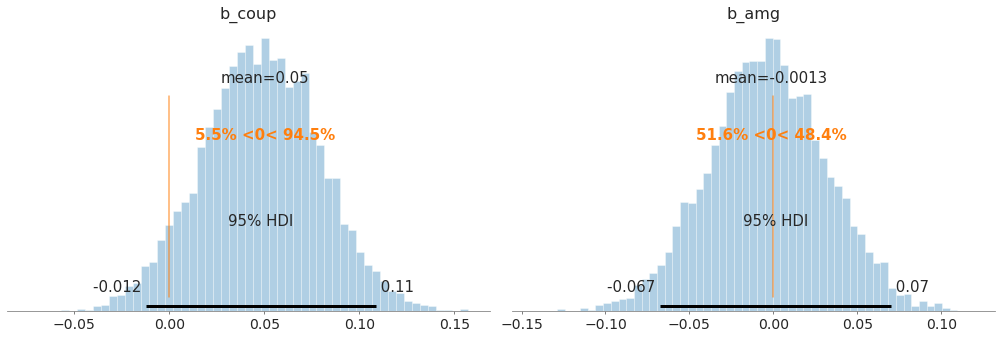

In [20]:
sns.set_style("ticks")
az.plot_posterior(trace1_scr, var_names=['b_coup','b_amg'], kind='hist', point_estimate='mean',
                 ref_val=0, hdi_prob=.95)


## Prediction error and coupling

In [28]:
# adding coupling per subject and hyper parameter
with pm.Model() as model3_pe:
    
    # adding intercept
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    
    mu_a = pm.Normal('mu_a', mu=0, sigma=.5)
    sigma_a = pm.HalfCauchy('sigma_a', .5)
    a_matt = pm.Normal('a_matt', mu=0, sd=1, shape=n_sub)
    a = pm.Deterministic('a', mu_a + sigma_a*a_matt)
        
    
    # add trials and amygdala activation
    b_trials = pm.Normal('b_trials', mu=0, sigma=.5)
    b_amg = pm.Normal('b_amg', mu=0, sigma=.5)
    
    # add coupling
    #b_coup = pm.Normal('b_coup', mu=0, sigma=.5)
    mu_coup = pm.Normal('mu_coup', mu=0, sigma=.5)
    sigma_coup = pm.HalfCauchy('sigma_coup', .5)
    coup_matt = pm.Normal('coup_matt', mu=0, sd=1, shape=n_sub)
    b_coup = pm.Deterministic('b_coup', mu_coup + sigma_coup*coup_matt)
    
  
    eps = pm.HalfCauchy('eps', .5)
    
    # make mu a determenistic distribution so we can test later vs. actual data
    
    mu = pm.Deterministic('mu',intercept + a[subIDX] + b_trials*trials + b_amg*df.amg + b_coup[subIDX]*df.coupling)
    
    y_hat = pm.Normal('y_hat', mu=mu, sigma=eps, observed=df.pe)
   
    
    trace3_pe = pm.sample(target_accept=.95, chains=4, cores=12, return_inferencedata=True, draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 12 jobs)
NUTS: [eps, coup_matt, sigma_coup, mu_coup, b_amg, b_trials, a_matt, sigma_a, mu_a, intercept]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 871 seconds.


In [29]:
az.summary(trace3_pe, var_names=['mu_coup','b_coup','b_amg','b_trials', 'mu_a', 'intercept'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_coup,0.102,0.019,0.067,0.139,0.000,0.000,21732.0,6192.0,1.0
b_coup[0],0.103,0.030,0.046,0.160,0.000,0.000,17950.0,6344.0,1.0
b_coup[1],0.099,0.030,0.039,0.155,0.000,0.000,16237.0,5841.0,1.0
b_coup[2],0.106,0.030,0.050,0.163,0.000,0.000,15964.0,6170.0,1.0
b_coup[3],0.099,0.030,0.042,0.157,0.000,0.000,17461.0,6161.0,1.0
...,...,...,...,...,...,...,...,...,...
b_coup[64],0.104,0.030,0.050,0.162,0.000,0.000,18202.0,6475.0,1.0
b_amg,0.050,0.023,0.003,0.091,0.000,0.000,21228.0,5136.0,1.0
b_trials,0.001,0.000,0.001,0.002,0.000,0.000,19504.0,5747.0,1.0
mu_a,-0.036,0.440,-0.845,0.807,0.004,0.005,10145.0,5570.0,1.0


In [30]:
0.102 / 0.019

5.368421052631579

Text(0.5, 1.0, 'Trial No')

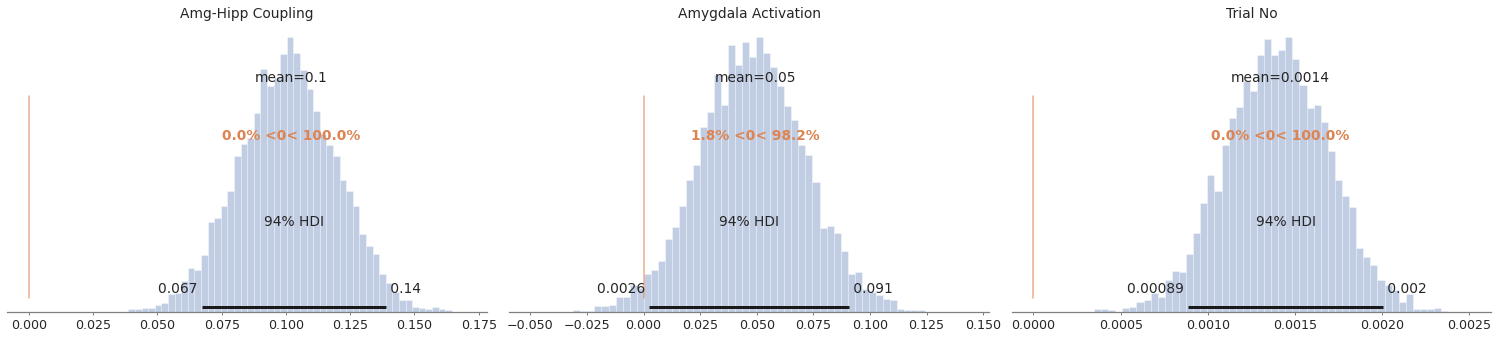

In [31]:
sns.set_style("ticks")
p = az.plot_posterior(trace3_pe, var_names=['mu_coup','b_amg','b_trials'],
                 kind='hist', ref_val=0, point_estimate='mean')
p[0].set_title("Amg-Hipp Coupling")
p[1].set_title("Amygdala Activation")
p[2].set_title("Trial No")

,n,r,CI95%,p-val,BF10,power
pearson,69,0.428226,"[0.21, 0.6]",0.000242,110.018,0.962642


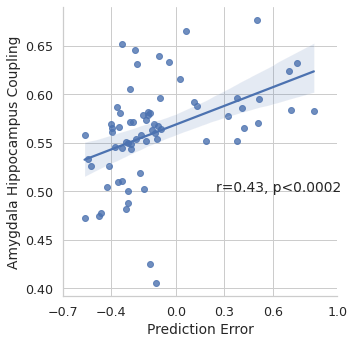

In [33]:
# plot results
forPlot = df.groupby(['Event.Nr']).mean()
sns.set(font_scale = 1.15)
sns.set_style("whitegrid")
a = sns.lmplot(x ='pe', y='coupling', data= forPlot)
a.set_axis_labels("Prediction Error")
a.set_ylabels("Amygdala Hippocampus Coupling")
plt.text(0.25,0.5, "r=0.43, p<0.0002")

a.set(xlim = (-0.7,0.95))
a.set(xticks=np.linspace(-0.7, 0.95, 6).round(1))
#a.savefig('pe_coupling.png', dpi=300, bbox_inches='tight')
pg.corr(forPlot['pe'], forPlot['coupling'])

In [35]:
# build histogram of correlations:
from scipy import stats
r = []
for sub in df['sub'].unique():
    #print(sub)
    rsub = stats.pearsonr(df['coupling'][df['sub']==sub], df['pe'][df['sub']==sub])
    print(rsub)
    r.append(rsub[0])

(0.18358455342386037, 0.13105003080151728)
(0.01672845025287515, 0.8914830437818538)
(0.09650640542953631, 0.43020489777093057)
(0.23571251353420294, 0.05120306883281633)
(0.15120224837221727, 0.21490900388936632)
(0.34527633851627704, 0.0036653364244787993)
(-0.1756418654684199, 0.14885548892276626)
(0.2404771709050358, 0.04654989304493334)
(0.14579915906704768, 0.2319411589063872)
(0.08149571889660102, 0.5056056122127184)
(0.24878549990139476, 0.039270072613687916)
(-0.08120395787134614, 0.5071355241777737)
(0.16977482582429856, 0.16312458813935046)
(0.04316227051598671, 0.7247280642692431)
(-0.0769446093802732, 0.5297379674769618)
(0.10549377175688042, 0.3883030291349239)
(0.14824025452580208, 0.22413359412232503)
(0.18692027955565238, 0.12407305946658946)
(0.21359737142547872, 0.07802564844113544)
(-0.07691303063230025, 0.5299073907775631)
(0.26116035473196275, 0.030196963504569796)
(-0.34060179497371723, 0.004186921484620766)
(0.14864200921505183, 0.22286644119607432)
(-0.11783216

Mean correlation 0.09539597172749545


Ttest_1sampResult(statistic=4.909665326801714, pvalue=6.612172752693224e-06)

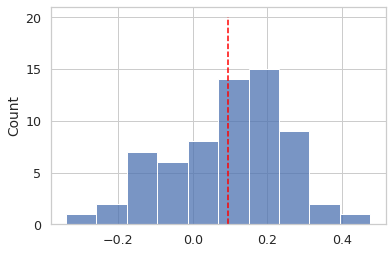

In [36]:
sns.histplot(r)
plt.vlines(np.mean(r), ymin=0, ymax=20, linestyles='dashed', color='red')
print(f'Mean correlation {np.mean(r)}')
stats.ttest_1samp(r, 0)

## Other Regions
- vmPFC

### General coupling

In [41]:
with pm.Model() as model1_vmpfc:
    
    
    mu_a = pm.Normal('mu_a', mu=0, sigma=.5)
    sigma_a = pm.HalfCauchy('sigma_a', .5)
    a_matt = pm.Normal('a_matt', mu=0, sd=1, shape=n_sub)
    a = pm.Deterministic('a', mu_a + sigma_a*a_matt)
    
    mu_b = pm.Normal('mu_b', mu=0, sigma=.5)
    sigma_b = pm.HalfCauchy('sigma_b', .5)
    b_matt = pm.Normal('b_matt', mu=0, sigma=1, shape=n_cond)
    b_cond = pm.Deterministic('b_cond', mu_b + sigma_b*b_matt)
    
    # add trials and amygdala activation
    b_trials = pm.Normal('b_trials', mu=0, sigma=.5)
    b_amg = pm.Normal('b_amg', mu=0, sigma=.5)
   
   
  
    eps = pm.HalfCauchy('eps', .5)
    
    # make mu a determenistic distribution so we can test later vs. actual data
    
    mu = pm.Deterministic('mu',a[subIDX] + b_cond[condIDX] + b_trials*trials + b_amg*df.amg)
    
    y_hat = pm.Normal('y_hat', mu=mu, sigma=eps, observed=df['amg_vmpfc'])
    
    trace1_vmpfc = pm.sample(target_accept=.95, chains=4, cores=12, return_inferencedata=True, draws=2000, tune=2000)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 12 jobs)
NUTS: [eps, b_amg, b_trials, b_matt, sigma_b, mu_b, a_matt, sigma_a, mu_a]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 583 seconds.
The number of effective samples is smaller than 25% for some parameters.


array([[<AxesSubplot:title={'center':'b_cond'}>,
        <AxesSubplot:title={'center':'b_cond'}>],
       [<AxesSubplot:title={'center':'b_matt'}>,
        <AxesSubplot:title={'center':'b_matt'}>]], dtype=object)

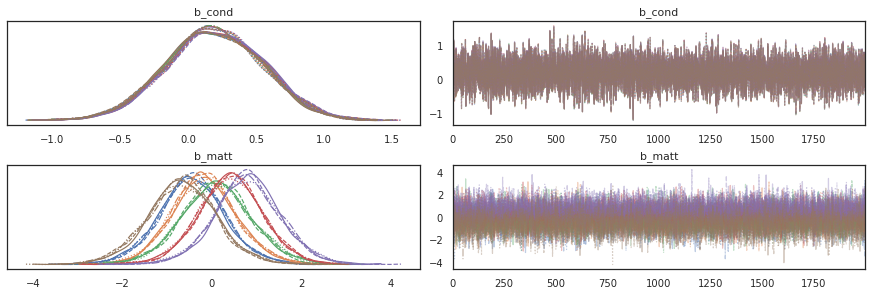

In [171]:
az.plot_trace(trace1_vmpfc, var_names=['b_cond', 'b_matt'])

In [42]:
trStackedvmPFC = trace1_vmpfc.posterior.stack(draws=('chain','draw'))


#### Remember the order to use for comparison
'CSminus1':0, 'CSplus1':1, 'CSplusUS1':2, 'CSplus2':3, 'CSminus2':4, 'CSminusUS2':5

In [43]:
trStackedvmPFC.b_cond.shape

(6, 8000)

In [44]:
csminus1 = trStackedvmPFC.b_cond[0,:].values
csplus1 = trStackedvmPFC.b_cond[1,:].values
csPlusUS1 = trStackedvmPFC.b_cond[2,:].values
csminus2 = trStackedvmPFC.b_cond[4,:].values
csplus2 = trStackedvmPFC.b_cond[3,:].values
csPlusUS2 = trStackedvmPFC.b_cond[5,:].values
csUSboth = np.mean(np.stack([csPlusUS1, csPlusUS2]), axis=0) # averaging across USs
csall = np.mean(np.stack([csminus1,csminus2, csplus1, csplus2]), axis=0) # averaging across CSs
usVcs = csUSboth - csall

<AxesSubplot:ylabel='Count'>

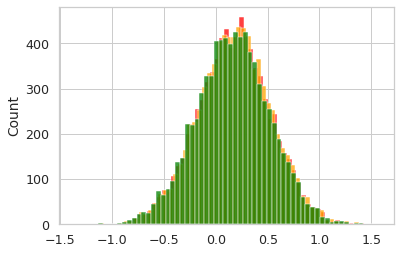

In [45]:
sns.histplot(csminus1, color='red')
sns.histplot(csplus1, color='orange')
sns.histplot(csPlusUS1, color='green')

Text(0.5, 1.0, 'CSPlusUS-CS in vmPFC')

<Figure size 1296x216 with 0 Axes>

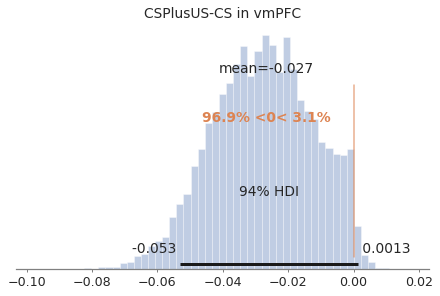

In [46]:
sns.set_style('ticks')
fig = plt.figure(figsize=(18,3))
az.plot_posterior(usVcs, point_estimate='mean', kind='hist', ref_val=0).set_title("CSPlusUS-CS in vmPFC")


In [47]:
print(f'Standardized coeficient {np.mean(usVcs) / np.std(usVcs)}')
az.summary(usVcs)

arviz - WARNING - Shape validation failed: input_shape: (1, 8000), minimum_shape: (chains=2, draws=4)


Standardized coeficient -1.7213404005895843


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-0.027,0.015,-0.053,0.001,0.0,0.0,2525.0,2069.0,NaN


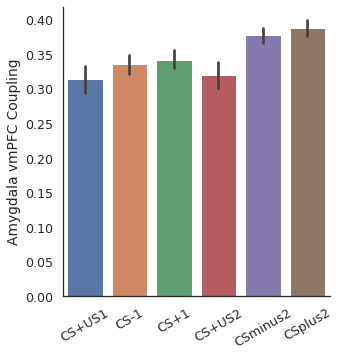

In [48]:
sns.set(font_scale = 1.15)
sns.set_style("white")
g = sns.catplot(y='amg_vmpfc',x='condition', data=df, kind='bar', ci=68)
g.set_xlabels("")
g.set_xticklabels(
    labels=["CS+US1", "CS-1", "CS+1", "CS+US2", "CSminus2", "CSplus2"], rotation=30)
g.set_ylabels("Amygdala vmPFC Coupling")
#g.savefig('coupling_different_Conditions.png', dpi=300, bbox_inches='tight')

### Behvarior (SCR)

In [107]:
df.head()

,sub,Condition,Event.Nr,CDA.AmpSum,expected_value,pe,scr,index,subject,trialNo,condition,coupling,amg,amg_vmpfc,amg_HippAnt,cond
0,sub-189,CSplusUS1,1,0.2852,0.775073,0.500000,0.2852,1794,sub-189,1,CSplusUS1,0.309524,0.981121,0.476190,0.285714,2
1,sub-189,CSminus1,2,0.1033,0.772940,-0.500000,0.1033,1795,sub-189,2,CSminus1,-0.571429,-0.027048,0.690476,-0.047619,0
2,sub-189,CSplus1,3,0.0783,0.774003,-0.500680,0.0783,1796,sub-189,3,CSplus1,-0.476190,-0.045910,0.285714,0.428571,1
3,sub-189,CSplusUS1,4,0.1772,0.775070,0.500002,0.1772,1797,sub-189,4,CSplusUS1,0.166667,-0.674150,0.547619,0.357143,2
4,sub-189,CSminus1,5,0.0000,0.771878,-0.499320,0.0000,1798,sub-189,5,CSminus1,0.214286,-0.065602,0.761905,-0.309524,0


In [134]:
n_sub

65

In [35]:
# use reparametarization of the same model
# add hyperpriors
with pm.Model() as scr_vmpfc:
    
    
    mu_a = pm.Normal('mu_a', mu=0, sigma=.5)
    sigma_a = pm.HalfCauchy('sigma_a', .5)
    a_matt = pm.Normal('a_matt', mu=0, sd=1, shape=n_sub)
    a = pm.Deterministic('a', mu_a + sigma_a*a_matt)
        
    mu_b = pm.Normal('mu_b', mu=0, sigma=.5)
    sigma_b = pm.HalfCauchy('sigma_b', .5)
    b_matt = pm.Normal('b_matt', mu=0, sigma=1, shape=n_cond)
    b_cond = pm.Deterministic('b_cond', mu_b + sigma_b*b_matt)
    
    # add trials and amygdala activation
    b_trials = pm.Normal('b_trials', mu=0, sigma=.5)
    b_amg = pm.Normal('b_amg', mu=0, sigma=.5)
    
    # add coupling
    b_coup = pm.Normal('b_coup', mu=0, sigma=.5)
    
    
  
    eps = pm.HalfCauchy('eps', .5)
    
    # make mu a determenistic distribution so we can test later vs. actual data
    
    #mu = pm.Deterministic('mu',a[subIDX] + b_cond[condIDX] + b_trials*trials + b_amg*df.amg + b_coup*df.amg_vmpfc)
    
    mu = a[subIDX] + b_cond[condIDX] + b_trials*trials + b_amg*df.amg + b_coup*df.amg_vmpfc
    
    y_hat = pm.Normal('y_hat', mu=mu, sigma=eps, observed=df.scr)
   
    
    trace1_scr_vmpfc = pm.sample(target_accept=.98, chains=4, cores=10, return_inferencedata=True, draws=2000, tune=2000)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 10 jobs)
NUTS: [eps, b_coup, b_amg, b_trials, b_matt, sigma_b, mu_b, a_matt, sigma_a, mu_a]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 487 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [36]:
az.summary(trace1_scr_vmpfc, var_names=['b_coup','b_cond','b_matt'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_coup,0.026,0.025,-0.020,0.076,0.000,0.000,6163.0,5409.0,1.0
b_cond[0],0.069,0.363,-0.617,0.732,0.006,0.004,3541.0,4191.0,1.0
b_cond[1],0.296,0.363,-0.407,0.944,0.006,0.005,3554.0,4151.0,1.0
b_cond[2],0.727,0.364,0.038,1.387,0.006,0.005,3536.0,4214.0,1.0
b_cond[3],0.277,0.364,-0.385,0.969,0.006,0.005,3556.0,4156.0,1.0
b_cond[4],0.370,0.364,-0.279,1.071,0.006,0.005,3548.0,4102.0,1.0
b_cond[5],0.584,0.364,-0.059,1.298,0.006,0.005,3549.0,4209.0,1.0
b_matt[0],-1.147,0.587,-2.239,-0.054,0.016,0.011,1414.0,2920.0,1.0
b_matt[1],-0.279,0.439,-1.126,0.498,0.012,0.008,1438.0,2825.0,1.0
b_matt[2],1.359,0.569,0.313,2.415,0.013,0.009,1784.0,3122.0,1.0


In [37]:
0.026 / 0.025

1.0399999999999998

<AxesSubplot:title={'center':'b_coup'}>

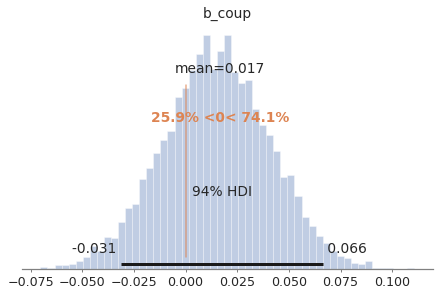

In [165]:
az.plot_posterior(trace1_scr_vmpfc,var_names=['b_coup'], kind='hist', ref_val=0, point_estimate='mean')

In [228]:
with pm.Model() as model1_pe_vmpfc:
    
    
    mu_a = pm.Normal('mu_a', mu=0, sigma=5)
    sigma_a = pm.HalfCauchy('sigma_a', 1)
    a_matt = pm.Normal('a_matt', mu=0, sd=1, shape=n_sub)
    a = pm.Deterministic('a', mu_a + sigma_a*a_matt)
        
    
    # add trials and amygdala activation
    b_trials = pm.Normal('b_trials', mu=0, sigma=5)
    b_amg = pm.Normal('b_amg', mu=0, sigma=5)
    
    # add coupling
    b_coup = pm.Normal('b_coup', mu=0, sigma=5)
     
    eps = pm.HalfCauchy('eps', 5)
    
    # make mu a determenistic distribution so we can test later vs. actual data  
    mu = pm.Deterministic('mu',a[subIDX] + b_trials*trials + b_amg*df.amg + b_coup*df.amg_vmpfc)
    
    y_hat = pm.Normal('y_hat', mu=mu, sigma=eps, observed=df.pe)
 
    trace1_pe_vmpfc = pm.sample(target_accept=.95, chains=4, cores=10, return_inferencedata=True, draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


AssertionError: ('The following error happened while compiling the node', Elemwise{Composite{sqr((i0 - (i1 + (i2 * i3) + (i4 * i5) + (i6 * i7))))}}[(0, 1)](TensorConstant{[ 0.5     ...18996728]}, AdvancedSubtensor1.0, InplaceDimShuffle{x}.0, TensorConstant{[ 0.  1.  ... 67. 68.]}, InplaceDimShuffle{x}.0, TensorConstant{[ 0.981121...17744505]}, InplaceDimShuffle{x}.0, TensorConstant{[0.9047619...8       ]}), '\n')

In [37]:
# adding coupling per subject and hyper parameter
with pm.Model() as model3_pe_vmpfc:
    
    # adding intercept
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    
    mu_a = pm.Normal('mu_a', mu=0, sigma=.5)
    sigma_a = pm.HalfCauchy('sigma_a', .5)
    a_matt = pm.Normal('a_matt', mu=0, sd=1, shape=n_sub)
    a = pm.Deterministic('a', mu_a + sigma_a*a_matt)
        
    
    # add trials and amygdala activation
    b_trials = pm.Normal('b_trials', mu=0, sigma=.5)
    b_amg = pm.Normal('b_amg', mu=0, sigma=.5)
    
    # add coupling
    #b_coup = pm.Normal('b_coup', mu=0, sigma=.5)
    mu_coup = pm.Normal('mu_coup', mu=0, sigma=.5)
    sigma_coup = pm.HalfCauchy('sigma_coup', .5)
    coup_matt = pm.Normal('coup_matt', mu=0, sd=1, shape=n_sub)
    b_coup = pm.Deterministic('b_coup', mu_coup + sigma_coup*coup_matt)
    
  
    eps = pm.HalfCauchy('eps', .5)
    
    # make mu a determenistic distribution so we can test later vs. actual data
    
    mu = pm.Deterministic('mu',intercept + a[subIDX] + b_trials*trials + b_amg*df.amg + b_coup[subIDX]*df.amg_vmpfc)
    
    y_hat = pm.Normal('y_hat', mu=mu, sigma=eps, observed=df.pe)
   
    
    trace3_pe_vmpfc = pm.sample(target_accept=.95, chains=4, cores=10, return_inferencedata=True, draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 10 jobs)
NUTS: [eps, coup_matt, sigma_coup, mu_coup, b_amg, b_trials, a_matt, sigma_a, mu_a, intercept]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 893 seconds.


In [38]:
az.summary(trace3_pe_vmpfc, var_names=['mu_coup','b_coup','b_amg','mu_a'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_coup,-0.044,0.016,-0.076,-0.015,0.000,0.000,18977.0,6310.0,1.0
b_coup[0],-0.035,0.040,-0.108,0.048,0.000,0.000,15081.0,5630.0,1.0
b_coup[1],-0.069,0.044,-0.156,0.008,0.001,0.000,6989.0,6249.0,1.0
b_coup[2],-0.036,0.038,-0.110,0.038,0.000,0.000,14324.0,6245.0,1.0
b_coup[3],-0.045,0.037,-0.113,0.033,0.000,0.000,15267.0,6311.0,1.0
...,...,...,...,...,...,...,...,...,...
b_coup[62],-0.034,0.042,-0.113,0.048,0.000,0.000,15608.0,5796.0,1.0
b_coup[63],-0.042,0.038,-0.115,0.033,0.000,0.000,14967.0,6036.0,1.0
b_coup[64],-0.015,0.045,-0.090,0.073,0.001,0.000,6417.0,6160.0,1.0
b_amg,0.048,0.023,0.006,0.092,0.000,0.000,15394.0,5051.0,1.0


In [60]:
az.summary(trace3_pe_vmpfc, var_names=['mu_coup','b_coup','b_amg','mu_a'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_coup,-0.052,0.017,-0.083,-0.021,0.000,0.000,16246.0,5644.0,1.0
b_coup[0],-0.042,0.039,-0.118,0.035,0.000,0.000,12202.0,5681.0,1.0
b_coup[1],-0.068,0.040,-0.151,0.001,0.000,0.000,10124.0,5545.0,1.0
b_coup[2],-0.047,0.036,-0.114,0.026,0.000,0.000,16200.0,6165.0,1.0
b_coup[3],-0.051,0.035,-0.118,0.017,0.000,0.000,14880.0,5839.0,1.0
...,...,...,...,...,...,...,...,...,...
b_coup[62],-0.041,0.038,-0.115,0.034,0.000,0.000,12566.0,5802.0,1.0
b_coup[63],-0.044,0.037,-0.111,0.032,0.000,0.000,13237.0,6393.0,1.0
b_coup[64],-0.027,0.044,-0.099,0.061,0.001,0.000,6661.0,6248.0,1.0
b_amg,0.058,0.024,0.011,0.103,0.000,0.000,19849.0,5720.0,1.0


array([<AxesSubplot:title={'center':'mu_coup'}>,
       <AxesSubplot:title={'center':'b_amg'}>], dtype=object)

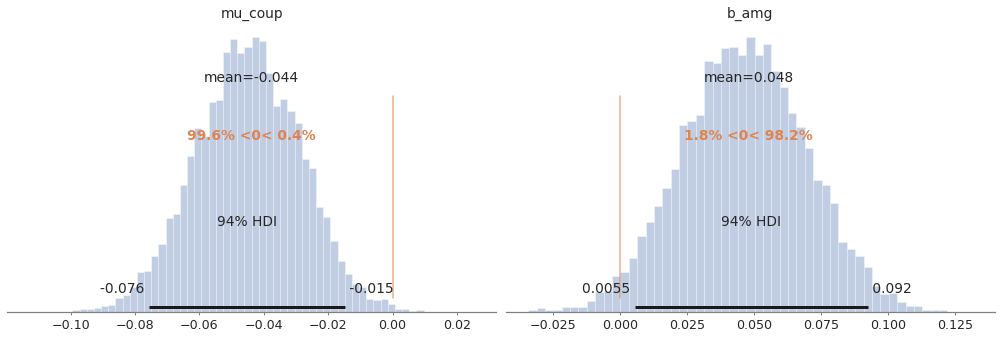

In [39]:
sns.set_style("ticks")
az.plot_posterior(trace3_pe_vmpfc, var_names=['mu_coup','b_amg'], kind='hist',
                 ref_val=0)

,n,r,CI95%,p-val,BF10,power
pearson,69,-0.292313,"[-0.49, -0.06]",0.014799,2.755,0.69204


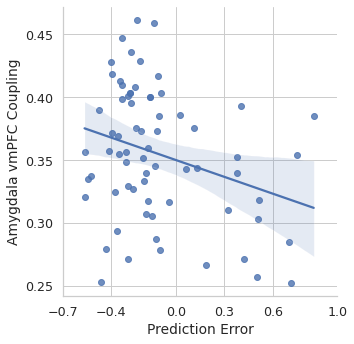

In [40]:
# plot results
forPlot = df.groupby(['Event.Nr']).mean()
sns.set(font_scale = 1.15)
sns.set_style("whitegrid")
a = sns.lmplot(x ='pe', y='amg_vmpfc', data= forPlot)
a.set_axis_labels("Prediction Error")
a.set_ylabels("Amygdala vmPFC Coupling")
#plt.text(-0.6,0.23, "r=0.42, p<0.0003")

a.set(xlim = (-0.7,0.95))
a.set(xticks=np.linspace(-0.7, 0.95, 6).round(1))
#a.savefig('pe_coupling.png', dpi=300, bbox_inches='tight')
pg.corr(forPlot['pe'], forPlot['amg_vmpfc'])